In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
import seaborn as sns

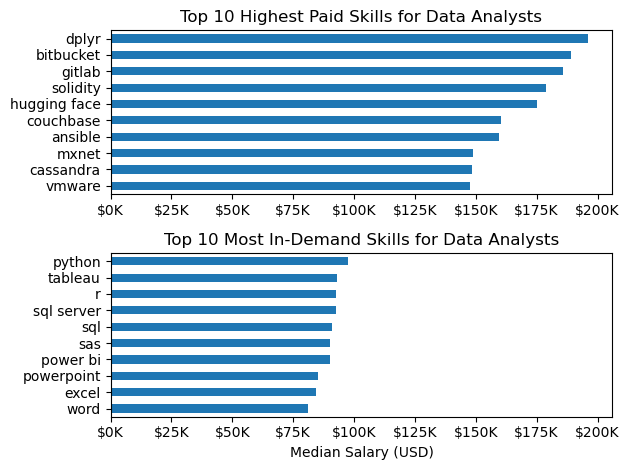

In [3]:
# only get data analyst jobs in US
# drop NaN values from ['salary_year_avg'] column for accurate visualisation

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

# explode job_skills column 

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_plot = df_DA_US.groupby('job_skills').agg(
    count=('job_skills', 'size'),
    median=('salary_year_avg', 'median')
)
df_DA_US_top_count = df_DA_US_plot.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_DA_US_top_pay = df_DA_US_plot.sort_values(by='median', ascending=False).head(10)


fig, ax = plt.subplots(2, 1)

df_DA_US_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_US_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout() 

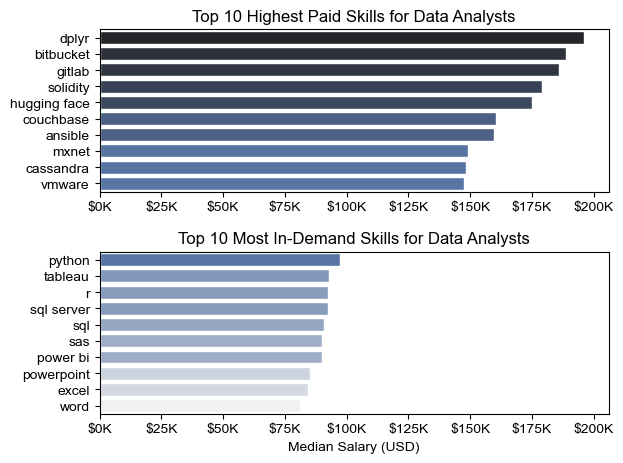

In [7]:
fig, ax = plt.subplots(2, 1)

# Seaborn

sns.set_theme(style="ticks")

sns.barplot(data=df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')         
ax[0].legend().remove()

# df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


sns.barplot(data=df_DA_US_top_count, x='median', y=df_DA_US_top_count.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

# df_DA_US_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

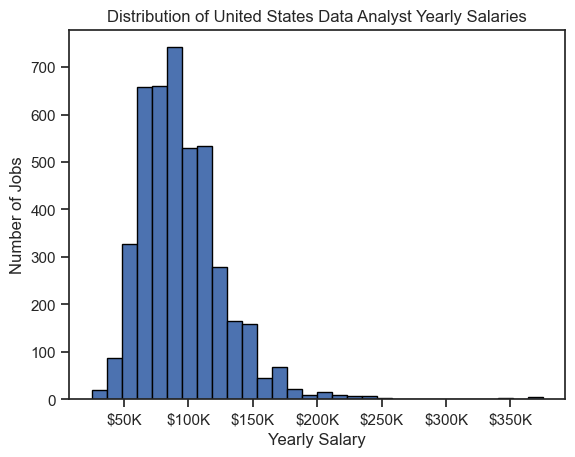

In [9]:
# Only get data analyst jobs in the US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

# format x axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))    

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

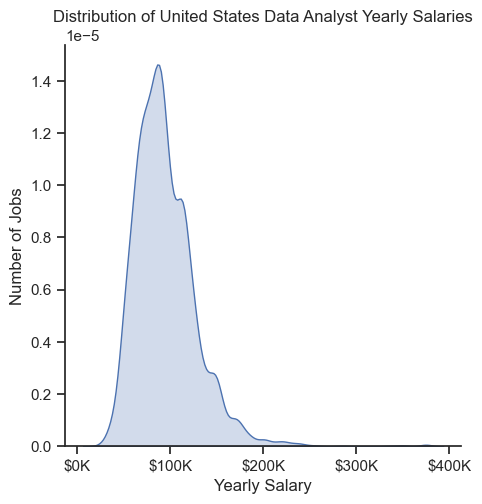

In [12]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

# format x axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))    

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

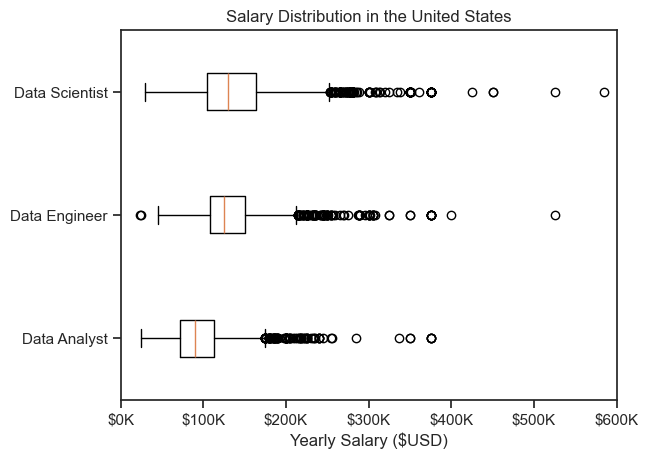

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

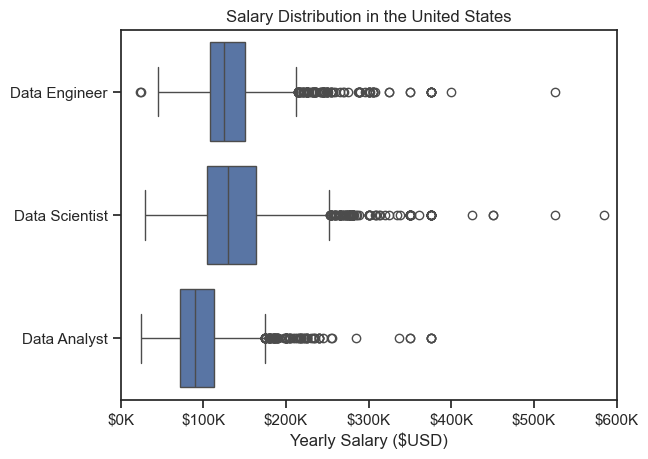

In [15]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.show()